## Load The Dataset

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('StudentsPerformance.csv')

# Show basic info
print(df.head())
print(df.info())


   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtyp

# Exploratory Data Analysis
### 1. Summary Statistics

In [2]:
print(df.describe(include='all'))

        gender race/ethnicity parental level of education     lunch  \
count     1000           1000                        1000      1000   
unique       2              5                           6         2   
top     female        group C                some college  standard   
freq       518            319                         226       645   
mean       NaN            NaN                         NaN       NaN   
std        NaN            NaN                         NaN       NaN   
min        NaN            NaN                         NaN       NaN   
25%        NaN            NaN                         NaN       NaN   
50%        NaN            NaN                         NaN       NaN   
75%        NaN            NaN                         NaN       NaN   
max        NaN            NaN                         NaN       NaN   

       test preparation course  math score  reading score  writing score  
count                     1000  1000.00000    1000.000000    1000.000000

### 2. Data Types and Unique Values

In [3]:
print(df.dtypes)
print(df.nunique())

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object
gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64


### 3. Missing Value Analysis

In [4]:
print(df.isnull().sum())


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


### 4. Outlier Detection (Boxplot)

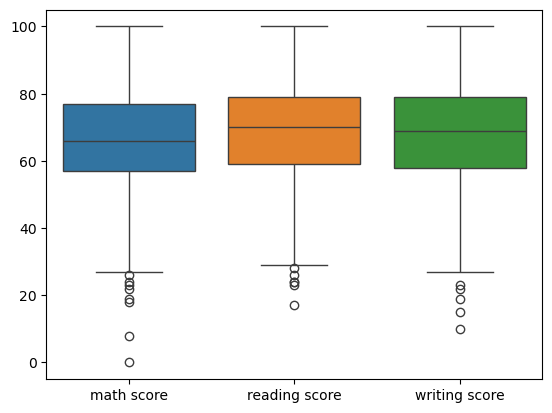

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df[['math score', 'reading score', 'writing score']])
plt.show()

### 5. Histograms

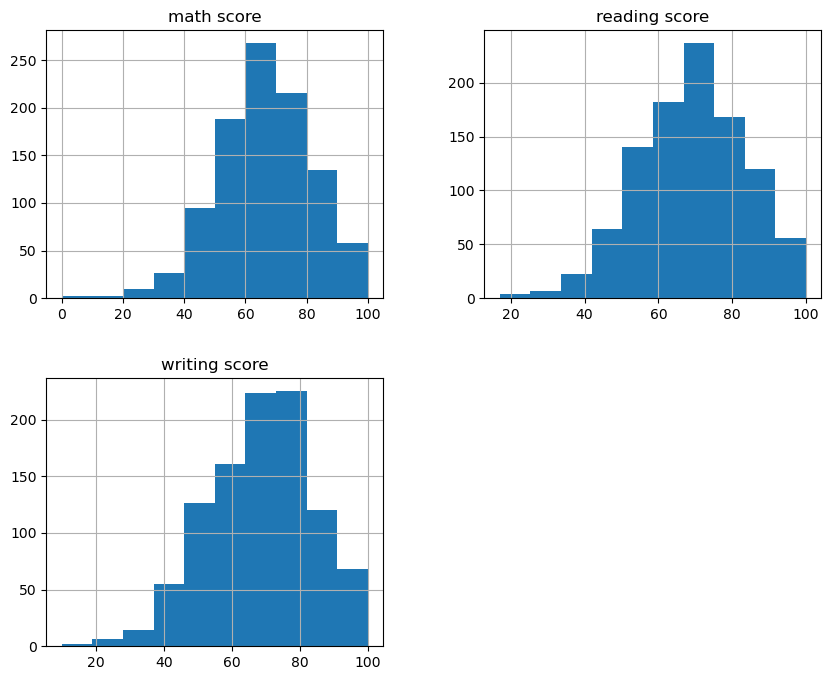

In [6]:
df.hist(figsize=(10, 8))
plt.show()

### 6. Correlation Matrix

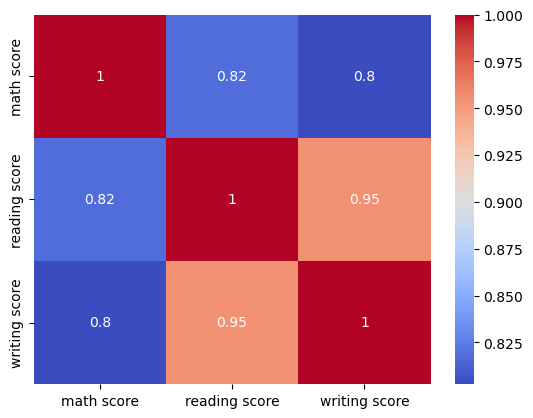

In [7]:
corr = df[['math score', 'reading score', 'writing score']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

### 7. Scatter Plots

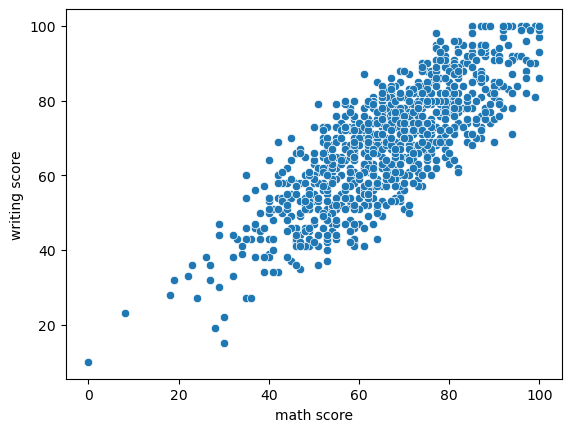

In [8]:
sns.scatterplot(x='math score', y='writing score', data=df)
plt.show()

### 8. Feature Distribution (Categorical)

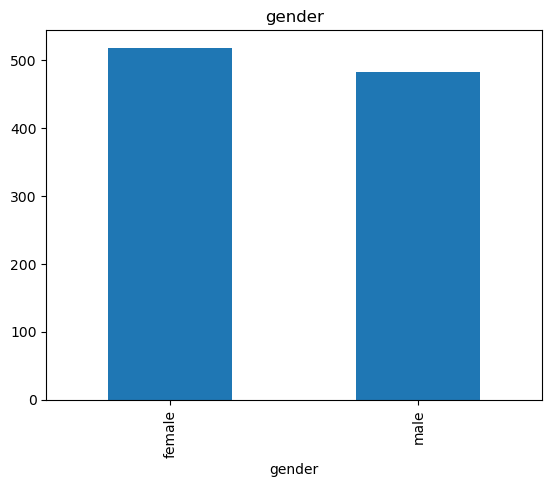

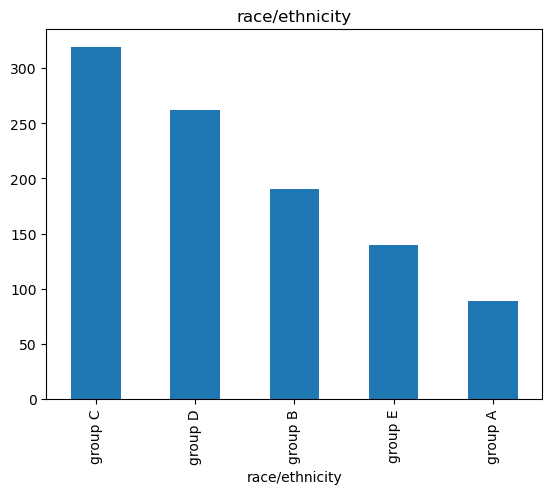

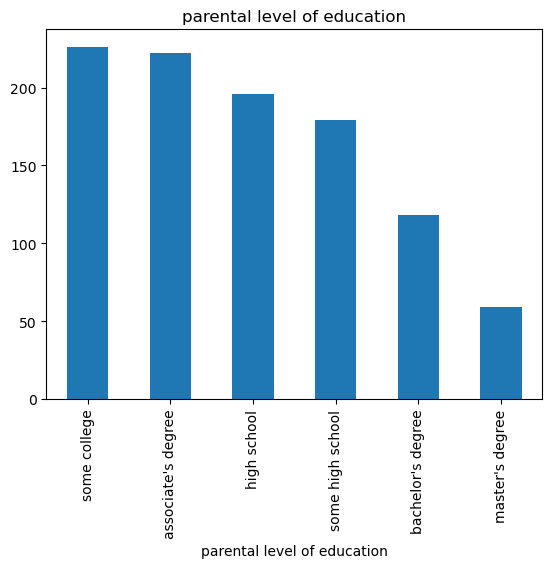

In [9]:
for col in ['gender', 'race/ethnicity', 'parental level of education']:
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

### 9. Grouped Aggregations

In [10]:
print(df.groupby('gender')[['math score', 'reading score', 'writing score']].mean())

        math score  reading score  writing score
gender                                          
female   63.633205      72.608108      72.467181
male     68.728216      65.473029      63.311203


### 10. Pairwise Feature Relationships

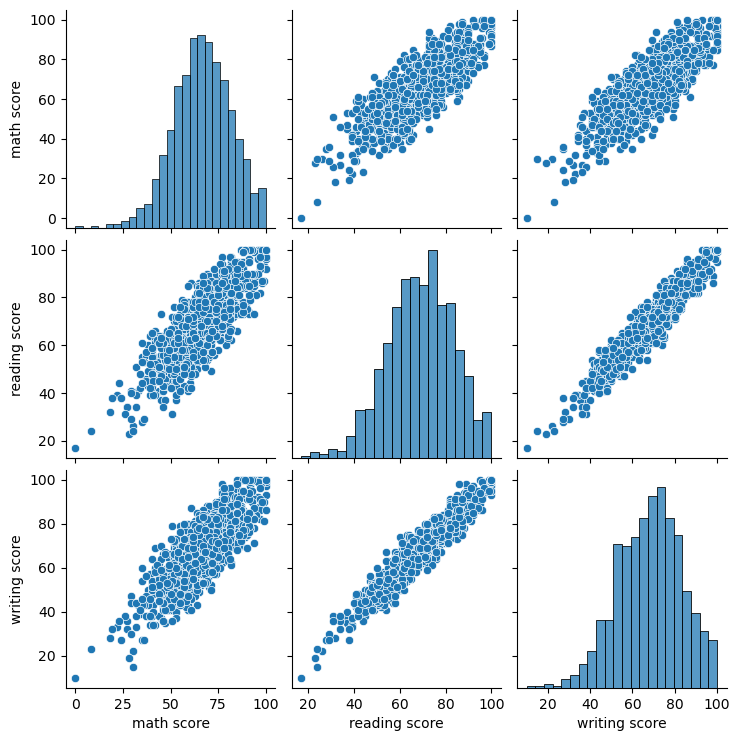

In [11]:
sns.pairplot(df[['math score', 'reading score', 'writing score']])
plt.show()

# Data Preprocessing

In [12]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Encode categoricals
df_encoded = df.copy()
le = LabelEncoder()
for col in df.select_dtypes(include='object'):
    df_encoded[col] = le.fit_transform(df[col])

# Features and target (e.g., predict math score)
X = df_encoded.drop(columns='math score')
y = df_encoded['math score']

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Machine Learning Model

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

# Predict and Evaluate
y_pred = model.predict(X_test)
print("RMSE:", root_mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

RMSE: 5.317450940660138
R2 Score: 0.8838026201112221
